In [1]:
import numpy as np
from scipy.integrate import dblquad, romberg, quad
import matplotlib.pyplot as plt

In [2]:
def disc_response_cos (Lk, alpha, R):
    def intg1 (phi,theta): ## note y first!
        LD = (np.sin(theta)*np.sin(phi)*np.sin(alpha)+ np.cos(theta)*np.cos(alpha))*Lk;
        return np.cos(LD)*np.sin(theta)
    return dblquad (intg1, 0,R, 0., 2*np.pi,epsabs=1e-10,epsrel=1e-10)[0]/(np.pi*R**2)

def disc_response_sin (Lk, alpha, R):
    def intg1 (phi,theta): ## note y first!
        LD = (np.sin(theta)*np.sin(phi)*np.sin(alpha)+ np.cos(theta)*np.cos(alpha))*Lk;
        return np.sin(LD)*np.sin(theta)
    return dblquad (intg1, 0,R, 0., 2*np.pi,epsabs=1e-10,epsrel=1e-10)[0]/(np.pi*R**2)

def pt_response_cos (Lk, alpha):
    LD = np.cos(alpha)*Lk;
    return np.cos(LD)

def rel_response2 (Lk, alpha, R):
    return disc_response_cos(Lk,alpha,R)/pt_response_cos(Lk,alpha)

def rel_response (Lk, alpha, R):
    c = disc_response_cos(Lk,alpha,R)
    s = disc_response_sin(Lk,alpha,R)
    res = np.sqrt(c**2+s**2)
    if rel_response2(Lk,alpha,R)<0:
        res*=-1
    return res


In [3]:
half_deg = 0.5/180*np.pi;
wave_5 = 3e8/5e6
k = 2*np.pi/wave_5

In [4]:
time = np.linspace (0,130,50)
baseline = np.hstack((np.logspace(0,np.log10(1500),31), np.logspace(np.log10(1500),np.log10(300),20)[1:]))

In [5]:
south  = -23/180*np.pi
sunrate = 2*np.pi/(28*24) #// per hour
morning = 24*sunrate ## assume one day checkout
landing_vec = np.array([0,-np.cos(south), np.sin(south)])
baseline_vec = np.array([0,np.sin(south), np.cos(south)])
baseline_vecew = np.array([1,0,0])
sun_height = morning+sunrate*time
sun_vec = np.array([np.cos(sun_height), -np.sin(sun_height),np.zeros_like(sun_height)]).T
alpha = np.arccos(np.sum(sun_vec*baseline_vec[None,:],axis=1))
alphaew = np.arccos(np.sum(sun_vec*baseline_vecew[None,:],axis=1))

Text(0, 0.5, 'response relative to the point source')

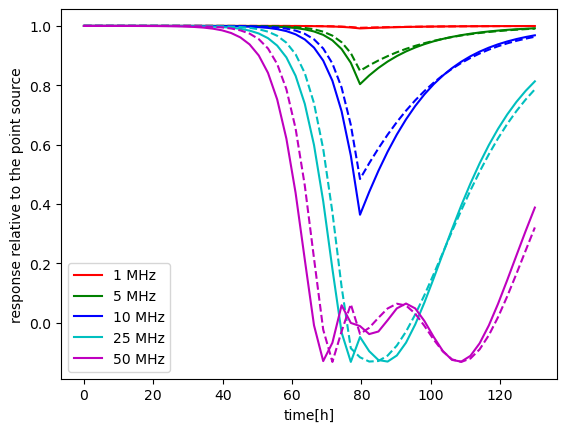

In [19]:
clr = "rgbcm"
for i, nu in enumerate([1,5,10,25,50]):
    wave = 3e8/(nu*1e6)
    k = 2*np.pi/wave
    r = [rel_response(baseline_*k,alpha_,half_deg) for baseline_, alpha_ in zip(baseline,alpha)]
    plt.plot(time,r,label=f'{nu} MHz', color=clr[i])
    r = [rel_response(baseline_*k,alpha_,half_deg) for baseline_, alpha_ in zip(baseline,alphaew)]
    plt.plot(time,r,'--',color=clr[i])
plt.legend()
plt.xlabel('time[h]') 
plt.ylabel('response relative to the point source')

Text(0, 0.5, 'baseline length')

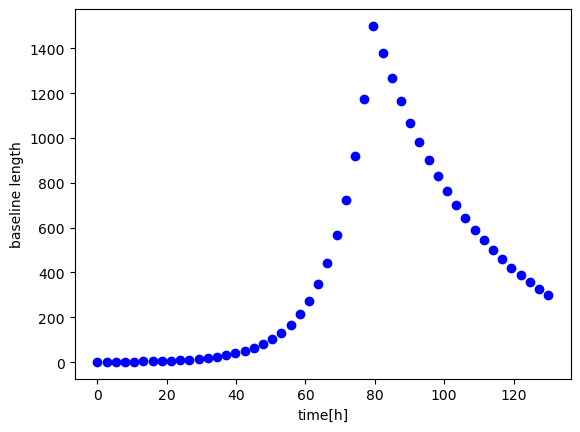

In [17]:
plt.plot(time, baseline,'bo')
plt.xlabel('time[h]')
plt.ylabel('baseline length [m]')

Text(0, 0.5, 'sun height [degrees]')

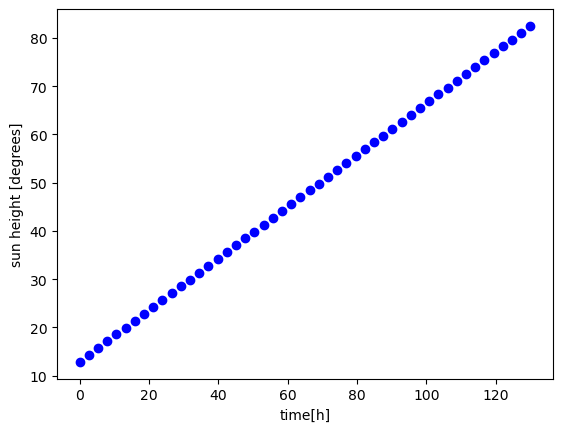

In [18]:
plt.plot(time, sun_height/np.pi*180,'bo')
plt.xlabel('time[h]')
plt.ylabel('sun height [degrees]')